# **STEP 5**

The final component of this project is testing the model that was trained. This involves loading test images and predicting the class of that image from the model designed. Testing the model requires the following steps:

• Data processing of test images to convert the images to the format of that of the input data utilized for the model trained. Use the image package from keras preprocessing to load the image, convert the image to an array, and normalize it by dividing the image by 255.

• Since this is a multi-class classification problem and the final model layer uses the softmax activation function, you would need to find the maximum probability from the model’s prediction.

In [12]:
# Import Libraries and Define Device

import torch
import os
import torch.nn as nn
from torchvision import transforms
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda") # gpu

In [13]:
# Access dataset name
print(os.listdir('/kaggle/input'))
print(os.listdir('/kaggle/input/dcnndataset'))

['dcnndataset', 'aer850-project-2-data']
['p2_DCNN_Model1.pt', 'p2_DCNN_Model2.pt']


In [14]:
# Redefining model 1 from Step 2

class DeeperCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(DeeperCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2,2)
        
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2,2)
        
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(128 * 32 * 32, 256)
        self.dropout1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(128, num_classes)
        
    def forward(self, x):
        x = F.relu(self.conv1(x)); x = self.pool1(x)
        x = F.relu(self.conv2(x)); x = self.pool2(x)
        x = F.relu(self.conv3(x)); x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x)); x = self.dropout1(x)
        x = F.relu(self.fc2(x)); x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Instantiate and load model created after step 4
model = DeeperCNN(num_classes=3)
model.load_state_dict(torch.load('/kaggle/input/dcnndataset/p2_DCNN_Model1.pt', map_location=device))
model.to(device)
model.eval()

DeeperCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=131072, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=128, out_features=3, bias=True)
)

In [15]:
# Load test images from given data folder
test_info = [
    {
        'img_path': '/kaggle/input/aer850-project-2-data/Data/test/crack/test_crack.jpg',
        'true_label': 'crack'
    },
    {
        'img_path': '/kaggle/input/aer850-project-2-data/Data/test/missing-head/test_missinghead.jpg',
        'true_label': 'missing-head'
    },
    {
        'img_path': '/kaggle/input/aer850-project-2-data/Data/test/paint-off/test_paintoff.jpg',
        'true_label': 'paint-off'
    }]

test_transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
])

# Creating class names for image classification
class_names = ['crack','missing-head','paint-off']

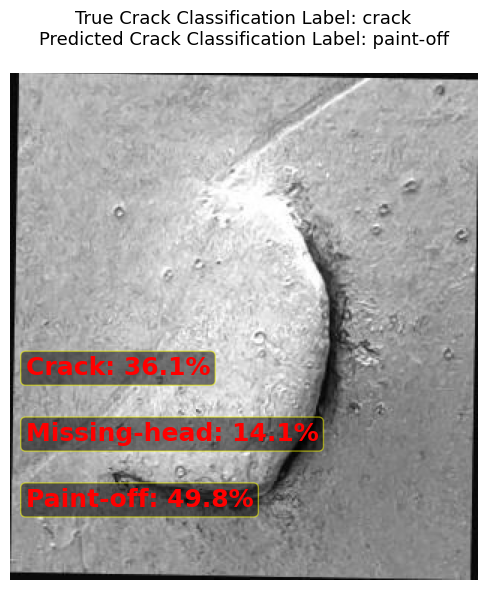

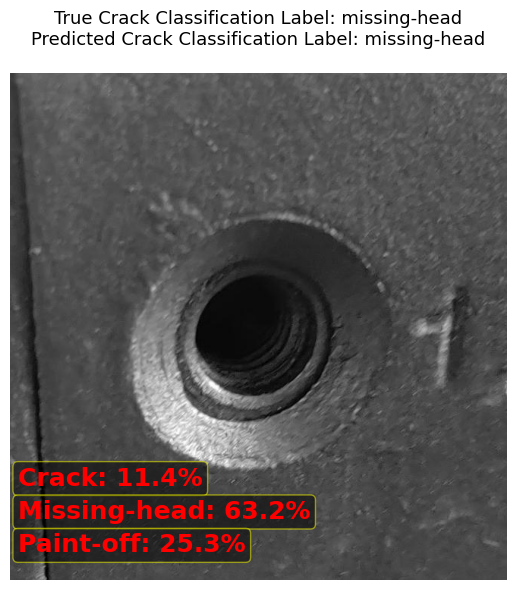

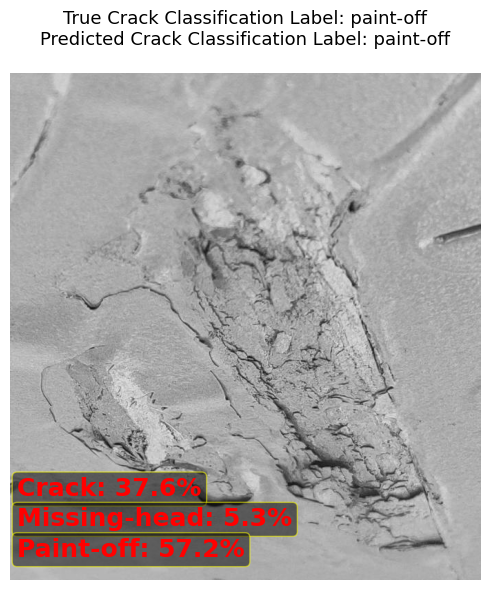

In [16]:
# Test Image Classification
for info in test_info:
    img_path = info['img_path']
    true_label = info['true_label']

    # Load image and preprocess
    img = Image.open(img_path).convert('RGB')
    img_tensor = test_transform(img).unsqueeze(0).to(device)

    # Inference/prediction
    with torch.no_grad():
        output = model(img_tensor)
        probs = torch.softmax(output, dim=1).cpu().numpy()[0]
        predicted_index = np.argmax(probs)
        predicted_label = class_names[predicted_index]

    # Plot with prediction overlay
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis('off')

    # Title showing true and predicted labels
    plt.title(
        f"True Crack Classification Label: {true_label}\n"
        f"Predicted Crack Classification Label: {predicted_label}",
        fontsize=13, pad=20
    )

    # Overlay probabilities on image
    start_y = img.height - 150
    line_gap = 44

    for i, name in enumerate(class_names):
        plt.text(
        10,
        start_y + i * line_gap,
        f"{name.capitalize()}: {probs[i]*100:.1f}%",
        color='red', fontsize=18, weight='bold',
        va='top',
        bbox=dict(facecolor='black', alpha=0.5, edgecolor='yellow',boxstyle='round,pad=0.2'),
    )

    plt.tight_layout()
    plt.show()

In [17]:
# Redefining model 2 from Step 2

class AdvancedCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(AdvancedCNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)

        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)

        # Dense layers
        self.fc1 = nn.Linear(256 * 16 * 16, 256)
        self.dropout1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(128, num_classes)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = F.relu(self.conv4(x))
        x = self.pool4(x)
        x = x.view(x.size(0), -1)  # flatten
        x = F.elu(self.fc1(x))
        x = self.dropout1(x)
        x = F.elu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x
        
model2 = AdvancedCNN(num_classes=3)
model2.load_state_dict(torch.load('/kaggle/input/dcnndataset/p2_DCNN_Model2.pt', map_location=device))
model2.to(device)
model2.eval()

AdvancedCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=128, out_features=3, bias=True)
)

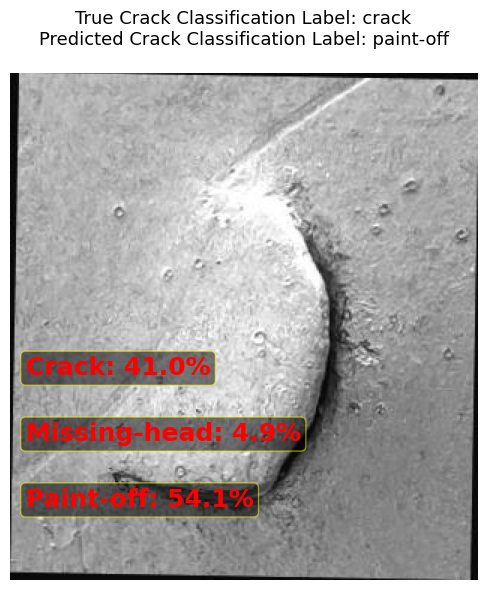

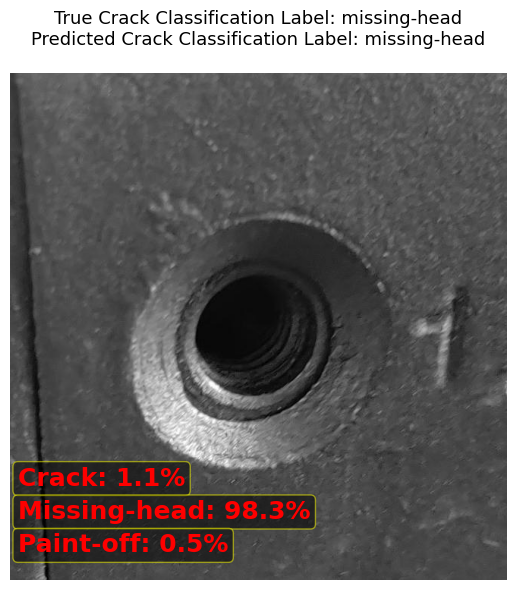

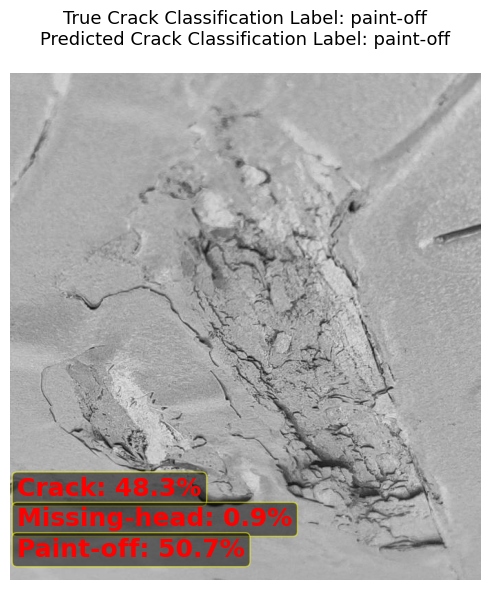

In [18]:
# Test Image Classification
for info in test_info:
    img_path = info['img_path']
    true_label = info['true_label']

    # Load image and preprocess
    img = Image.open(img_path).convert('RGB')
    img_tensor = test_transform(img).unsqueeze(0).to(device)

    # Inference/prediction
    with torch.no_grad():
        output = model2(img_tensor)
        probs = torch.softmax(output, dim=1).cpu().numpy()[0]
        predicted_index = np.argmax(probs)
        predicted_label = class_names[predicted_index]

    # Plot with prediction overlay
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis('off')

    # Title showing true and predicted labels
    plt.title(
        f"True Crack Classification Label: {true_label}\n"
        f"Predicted Crack Classification Label: {predicted_label}",
        fontsize=13, pad=20
    )

    # Overlay probabilities on image
    start_y = img.height - 150
    line_gap = 44

    for i, name in enumerate(class_names):
        plt.text(
        10,
        start_y + i * line_gap,
        f"{name.capitalize()}: {probs[i]*100:.1f}%",
        color='red', fontsize=18, weight='bold',
        va='top',
        bbox=dict(facecolor='black', alpha=0.5, edgecolor='yellow',boxstyle='round,pad=0.2'),
    )

    plt.tight_layout()
    plt.show()